# Tutorial 2: Part 1

Objectives:

- Quantify the natural chromaticity of our FODO cell.
- First tracking of particles.

**Natural chromaticity**
<div>
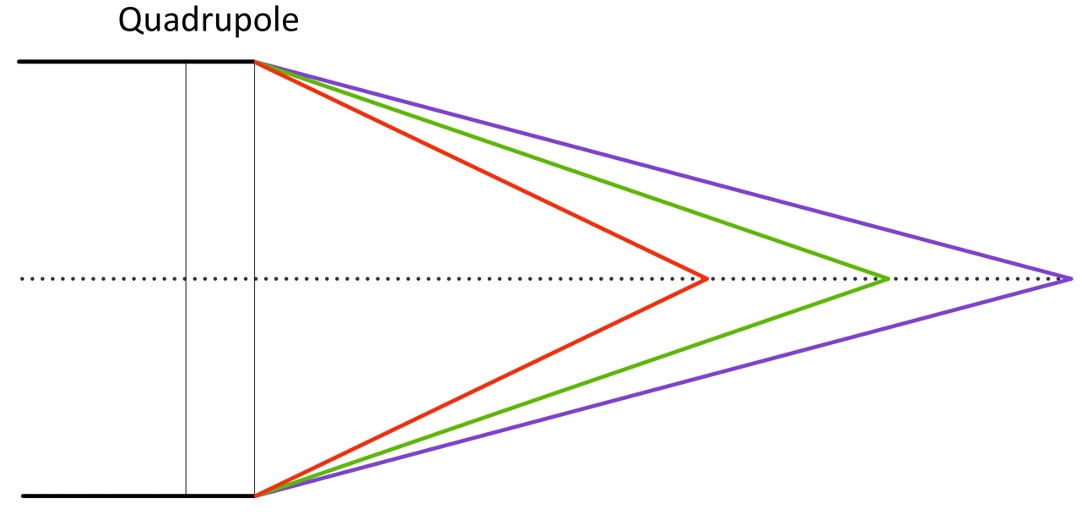
</div>


1. Convert the sequence of Tutorial 1: Part 3 in thin lenses with the following commands:
    
        select, flag=MAKETHIN, SLICE=5;
        MAKETHIN, SEQUENCE=MY_SEQUENCE;
        use, sequence=MY_SEQUENCE;
        
    It is important when defining the SEQUENCE to refer to the the center, to make it compatible with the makethin command!

    Note that this step is required to allow particle tracking in MAD-X.


2. With a matching block adjust the tunes of the cell to 0.25.


3. Using the chromaticities obtained from the TWISS, compute the tunes for particles with $\Delta p / p = 10^{-3}$.


4. Track a particle with initial coordinates x,y,px,py = (1,1,0,0) mm in 100 cells. Plot the x-px phase space. 
    
        track, dump;    
        start, x=1e-3, px=0, y=1e-3, py=0;    
        run, turns=100;   
        endtrack;


5. How does the particle move in the phase space, turn after turn? Do you see the tunes?


6. Track a particle with initial coordinates x,y,px,py=(100, 100, 0, 0) mm in 100 turns. Plot the x-px phase-space. Does something change with respect to the previous case? Why?


7. Repeat the tracking adding DELTAP=1e-2 to the track command. How does the phase space look now? is the tune still same? It may help to look only at the first 4 turns to get a clearer picture.

        track, dump, DELTAP=1e-2;  


In [1]:
from matplotlib import pyplot as plt
%matplotlib notebook
import numpy as np
from cpymad.madx import Madx 

In [2]:
myMad = Madx(stdout=True)

1. Convert the sequence of Tutorial 1: Part 3 in thin lenses with the following commands:
    
        MAKETHIN, SEQUENCE=MY_SEQUENCE;
        use, sequence=MY_SEQUENCE;

    Note that this step is required to allow particle tracking in MAD-X.

In [3]:
myMad = Madx(stdout=True)
myString='''
! *********************************************************************
! Definition of parameters
! *********************************************************************
!! General parameters
Lcell = ??;
nBend=??;

!! Dipole Parameters
Ld = ??;
Ad = ??;

!! Quadrupole Parameters
K1F = ??;
K1D = ??;
Lq =??;

! *********************************************************************
! Definition of magnets
! ********************************************************************* 

QF: QUADRUPOLE, L:=Lq, K1:=K1F;
QD: QUADRUPOLE, L:=Lq, K1:=K1D;
BM: SBEND, L=Ld, angle:=Ad;

! *********************************************************************
! Definition of sequence
! *********************************************************************

JUAS: SEQUENCE, REFER=center, L=??; !it is important to refer to the the center this time, to make it compatible with the makethin 
qf: QF, at=??;
b1:  BM, at=??;
b2:  BM, at=??;
qd: QD, at=??;
b3:  BM, at=??;
b4:  BM, at=??;
ENDSEQUENCE;

! *********************************************************************
! Definition of beam
! *********************************************************************

beam, particle=proton, energy=??;

! *********************************************************************
! ACTIVATE SEQUENCE
! *********************************************************************

use, sequence=JUAS;

! *********************************************************************
! TWISS
! *********************************************************************

twiss, table= thick_sequence;

! *********************************************************************
! MEKETHIN
! *********************************************************************

??

! *********************************************************************
! ACTIVATE NEW SEQUENCE
! *********************************************************************

use, sequence=JUAS;

! *********************************************************************
! TWISS
! *********************************************************************

twiss, table= thin_sequence;
'''
myMad.input(myString);

# Comparing the thick and thin sequence.

In [ ]:
thinDF=myMad.table['thin_sequence'].dframe()
thinDF[["name", "keyword", "betx","bety","alfx", "alfy", "mux", "muy"]].head()

In [ ]:
thickDF=myMad.table['thick_sequence'].dframe()
thickDF[["name", "keyword", "betx","bety","alfx", "alfy", "mux", "muy"]].head()

In [ ]:
#Try to plot the beta function for each case

# Matching the tunes

2. With a matching block adjust the tunes of the cell to 0.25.

In [4]:
myString='''

//*************************************************//
!   ACTIVATE THE SEQUENCE
//*************************************************//

use, sequence=JUAS;

//*************************************************//
!   MATCHING OF THE TUNES
//*************************************************//

match, sequence=JUAS;
!! Variables
vary,name=??,step=0.0001;
vary,name=??,step=0.0001;
!! Constraints
global, Q1=??;
global, Q2=??;
!! The next line ask MAD-X to do the matching itself
LMDIF, calls = 1000, tolerance=1E-12;
endmatch;

//*************************************************//
!   TWISS
//*************************************************//
twiss, table=thin_new_wp;
'''
myMad.input(myString);

# Chromaticity
3. Using the chromaticities obtained from the TWISS, compute the tunes for $\Delta p / p = 10^{-3}$.

**REMEMBER** That the derivative functions in MAD-X are normalized by the relativistic factor beta.

We could assume ultra-relativistic beam.

# Tracking
4. Track a particle with initial coordinates x,y,px,py = (1,1,0,0) mm for 100 turns. Plot the x-px phase space. 
    
        track, dump;    
        start, x=1e-3, px=0, y=1e-3, py=0;    
        run, turns=100;   
        endtrack;
        
5. How does the particle move in the phase space, cell after cell? Do you see the tunes?
    

In [13]:
myString='''
//*************************************************//
!   TRACKING
//*************************************************//

track,dump,file='linear_machine', DELTAP=0.00;
start, x= ??, px=??, y= ??, py=??;
run,turns=100;
endtrack;

!plot, file="linear_machine",table=track,haxis=x,vaxis=px,
!particle=1,2, colour=100;
!plot, file="linear_machine",table=track,haxis=y,vaxis=py,
!particle=1,2, colour=100;
'''
myMad.input(myString);

In [ ]:
#When activating the option dump on the trck module  new table is generated by MADX with the tracking results
particle1=myMad.table['track.obs0001.p0001'].dframe()

In [ ]:
particle1

In [ ]:
%matplotlib notebook
plt.plot(particle1['x'],particle1['px'],'ob',label='X-phase space')
#plt.plot(particle2['x'],particle2['px'],'or',label='X-phase space')
plt.xlabel('[m]')
plt.ylabel('[rad]')
plt.legend(loc='best')
plt.xlim(-0.003,0.003)
plt.ylim(-5e-5, 5e-5)

In [ ]:
%matplotlib notebook
plt.plot(particle1['y'],particle1['py'],'.r',label='Y-phase space')
plt.xlabel('[m]')
plt.ylabel('[rad]')
plt.legend(loc='best')

# Traking particles with larger amplitude
6. Track a particle with initial coordinates x,y,px,py=(100, 100, 0, 0) mm in 100 cells. Plot the x-px phase-space. Does something change with respect to the previous case? Why?

In [35]:
myString='''
//*************************************************//
!   TRACKING
//*************************************************//

track,dump,file='linear_machine', DELTAP=0.00;
start, x= ??, px=??, y= ??, py=??;
run,turns=??;
endtrack;

!plot, file="linear_machine",table=track,haxis=x,vaxis=px,
!particle=1,2, colour=100;
!plot, file="linear_machine",table=track,haxis=y,vaxis=py,
!particle=1,2, colour=100;
'''
myMad.input(myString);

In [36]:
particle2=myMad.table['track.obs0001.p0001'].dframe()

In [ ]:
%matplotlib notebook
#plt.plot(particle1['x'],particle1['px'],'ob',label='X-phase space')
plt.plot(particle2['x'],particle2['px'],'or',label='X-phase space')
plt.xlabel('[m]')
plt.ylabel('[rad]')
plt.legend(loc='best')
#plt.xlim(-0.003,0.003)
#plt.ylim(-5e-5, 5e-5)

In [3]:
#Try also to plot the amplitude of the particle vs the turn number


# Track off-momentum

7. Repeat point 4 adding DELTAP=1e-2 to the track command. How does the phase space look now? Is the tune still same? It may help to look only at the first 4 turns to get a clearer picture.

In [40]:
myString='''
//*************************************************//
!   TRACKING
//*************************************************//

track,dump,file='linear_machine_off_energy', DELTAP=??;
start, x= ??, px=??, y= ??, py=??;
start, x= ??, px=??, y= ??, py=??;
run,turns=??;
endtrack;

!plot, file="linear_machine",table=track,haxis=x,vaxis=px,
!particle=1,2, colour=100;
!plot, file="linear_machine",table=track,haxis=y,vaxis=py,
!particle=1,2, colour=100;
'''
myMad.input(myString);

In [41]:
off_momentum_particle1=myMad.table['track.obs0001.p0001'].dframe()
off_momentum_particle2=myMad.table['track.obs0001.p0002'].dframe()

In [ ]:
%matplotlib notebook
plt.plot(off_momentum_particle1['x'],off_momentum_particle1['px'],'ob',label='X-phase space')
plt.plot(off_momentum_particle1['y'],off_momentum_particle1['py'],'.r',label='Y-phase space')
plt.xlabel('[m]')
plt.ylabel('[rad]')
plt.legend(loc='best')

In [4]:
#What happened?

In [ ]:
%matplotlib notebook
plt.plot(off_momentum_particle1['turn'],off_momentum_particle1['x'],'.-b', label='off-momentum')
plt.plot(particle1['turn'],particle1['x'],'.-r', label='on-momentum')
plt.xlabel('Turn')
plt.ylabel('[m]');
plt.legend(loc='best');